<a href="https://colab.research.google.com/github/Naveen-DS08/Lead_Scoring_Assignment/blob/main/Lead_scoring_CaseStudy_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing basic libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# **Data Reading and Understanding**

In [3]:
# Importing the dataset

leads_df = pd.read_csv('https://raw.githubusercontent.com/Naveen-DS08/Lead_Scoring_Assignment/main/Leads.csv')

leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# shape of data
leads_df.shape

(9240, 37)

The dataset contains more than 9000 rows with 37 features

In [5]:
# Cheacking for any duplicates present in the data

leads_df.duplicated().sum()

0

In [6]:
# Basic information about the data
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Many of the categorical variables have a level called 'Select' which needs to be handled

# **Data Cleaning**

In [7]:
# Replacing 'Select' variable to null
leads_df = leads_df.replace('Select',np.NAN)

In [8]:
# Percentage of null values present in each features

(leads_df.isnull().mean()*100).round(2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

There is no use with features has more than 40 percentage of null values, Hence we can drop these features.

In [9]:
# Removing the features having more than 40% of null values

features_with_more_nullValue = [ i for i in leads_df.columns if (leads_df[i].isnull().mean()*100) > 40 ]

leads_df.drop(features_with_more_nullValue,axis=1, inplace=True)

In [10]:
# Now checking the shape of the data

leads_df.shape

(9240, 30)

In [11]:
# 'city' feature which has almost 40% null values, we can drop
leads_df.drop(['City'], axis=1, inplace=True)

In [12]:
# Checking 'Specialization' feature which has 36.53% of null values

leads_df['Specialization'].value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

It may be possible that the lead may leave this column blank if he may be a student or his specialization is not there in the options given. So we can create a another category 'Others' for this.


In [13]:
# Replacing null variable to 'others'

leads_df['Specialization'] = leads_df['Specialization'].replace(np.NaN, 'Others')

In [14]:
# Checking 'Tags' feature which has 36.29% of null values

leads_df['Tags'].value_counts(normalize=True, dropna=False)*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

Since, missing values are high , we can impute all missing values with value 'not provided'

In [15]:
# Replacing nul value with 'not provided'
leads_df['Tags'] = leads_df['Tags'].replace(np.nan,'not provided')

In [16]:
# Checking 'What matters most to you in choosing a course' feature which has 29.32% null values

leads_df['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

We can see that this is highly skewed feature so we can remove this feature.

In [17]:
# Drop this features

leads_df.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

In [18]:
# Checking 'What is your current occupation' feature which has 29.11% null values
leads_df['What is your current occupation'].value_counts(dropna=False, normalize=True)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [19]:
# Replace null values with 'Other' which already present
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan,'Other')

In [20]:
# Checking Country feature which has 26.63% of null values

leads_df['Country'].value_counts(dropna=False, normalize=True)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

Since the 'Country' feature is highly skewed, we can remove this feature

In [21]:
# Droping 'Country' feature

leads_df.drop(['Country'], axis=1, inplace=True)

In [22]:
# Rechecking the percentage of null values present in the data

(leads_df.isnull().mean()*100).round(2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Prospect ID                                 0.00
X Education Forums                          0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Tags                                        0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
Search                                      0.00
Newspaper Article                           0.00
Magazine                                    0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization      

Dropping the rows which has null values since it is less than 2 percent

In [23]:
# Dropping the rows with null values
leads_df.dropna(inplace=True)

In [24]:
# Now checking for the null values present in the data

leads_df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                              

Now we dont have any null values present in the data

In [25]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

In [26]:
# Categorical features
cat_features = [feature for feature in leads_df.columns
                   if leads_df[feature].dtypes == 'O' ]

cat_features

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [27]:
# Looking data frame with categorical features
leads_df[cat_features].head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,Others,Unemployed,No,No,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,Others,Unemployed,No,No,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,Business Administration,Student,No,No,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,Media and Advertising,Unemployed,No,No,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,Others,Unemployed,No,No,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [28]:
# Checking for number of unique values present in categorical data frame

leads_df[cat_features].nunique()

Prospect ID                                 9074
Lead Origin                                    4
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Last Activity                                 17
Specialization                                19
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Tags                                          27
Update me on Supply Chain Content              1
Get updates on DM Content                      1
I agree to pay the amount through cheque       1
A free copy of Maste

Since Prospect ID is the unique id and we also don't need for future analysis. we can either drop or change this featur as index.

For our cases we don't drop we change this to index.

In [29]:
# Setting Prospect ID as index

leads_df.set_index(['Prospect ID'],inplace=True)


In [30]:
# Lets update the categorical feature list once.
cat_features = [feature for feature in leads_df.columns
                   if leads_df[feature].dtypes == 'O' ]

In [31]:
#remove categorical variables that are present less than 1% of the observations
# since these variables doesnt affects our analysis
for feature in cat_features:
    temp_df = leads_df.groupby(feature)['Converted'].mean()
    temp_cols = temp_df[temp_df>0.01].index
    leads_df[feature] = np.where(leads_df[feature].isin(temp_cols),leads_df[feature],'rareVar')


In [32]:
# Rechecking number of unique values present
leads_df[cat_features].nunique()

Lead Origin                                  4
Lead Source                                 15
Do Not Email                                 2
Do Not Call                                  2
Last Activity                               17
Specialization                              19
What is your current occupation              6
Search                                       2
Magazine                                     1
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Receive More Updates About Our Courses       1
Tags                                        21
Update me on Supply Chain Content            1
Get updates on DM Content                    1
I agree to pay the amount through cheque     1
A free copy of Mastering The Interview       2
Last Notable Activity                       15
dtype: int64

In [33]:
# value counts in categorical features

for feature in cat_features:
  print(feature)
  print(leads_df[feature].value_counts(normalize=True)*100)
  print('*'*50)

Lead Origin
Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: Lead Origin, dtype: float64
**************************************************
Lead Source
Google              31.606789
Direct Traffic      28.025127
Olark Chat          19.318933
Organic Search      12.717655
Reference            4.882081
Welingak Website     1.421644
Referral Sites       1.377562
Facebook             0.341635
rareVar              0.132246
bing                 0.066123
Click2call           0.044082
Social Media         0.022041
Live Chat            0.022041
WeLearn              0.011020
NC_EDM               0.011020
Name: Lead Source, dtype: float64
**************************************************
Do Not Email
No     92.109323
Yes     7.890677
Name: Do Not Email, dtype: float64
**************************************************
Do Not Call
No     99.977959
Yes     0.022041
Name: Do Not Call, dtype: flo

As we can see many categorical features are highly skewed. we can drop the features which has the variable skeweness above 95%

In [34]:
feature_to_drop = ['Do Not Call','Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                   'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']

In [35]:
leads_df.drop(feature_to_drop, axis=1, inplace=True)

leads_df.shape

(9074, 14)

In [36]:
leads_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

We can drop 'Tags' features also since this feature is generated by the sales team for their analysis,this may not be useful for our model building

In [37]:
# Dropping 'Tags' feature
leads_df.drop(['Tags'], axis=1,inplace=True)

In [38]:
num_features = [ i for i in leads_df.columns if leads_df[i].dtypes != 'O']
num_features

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

# **Exploratory Data Analysis**

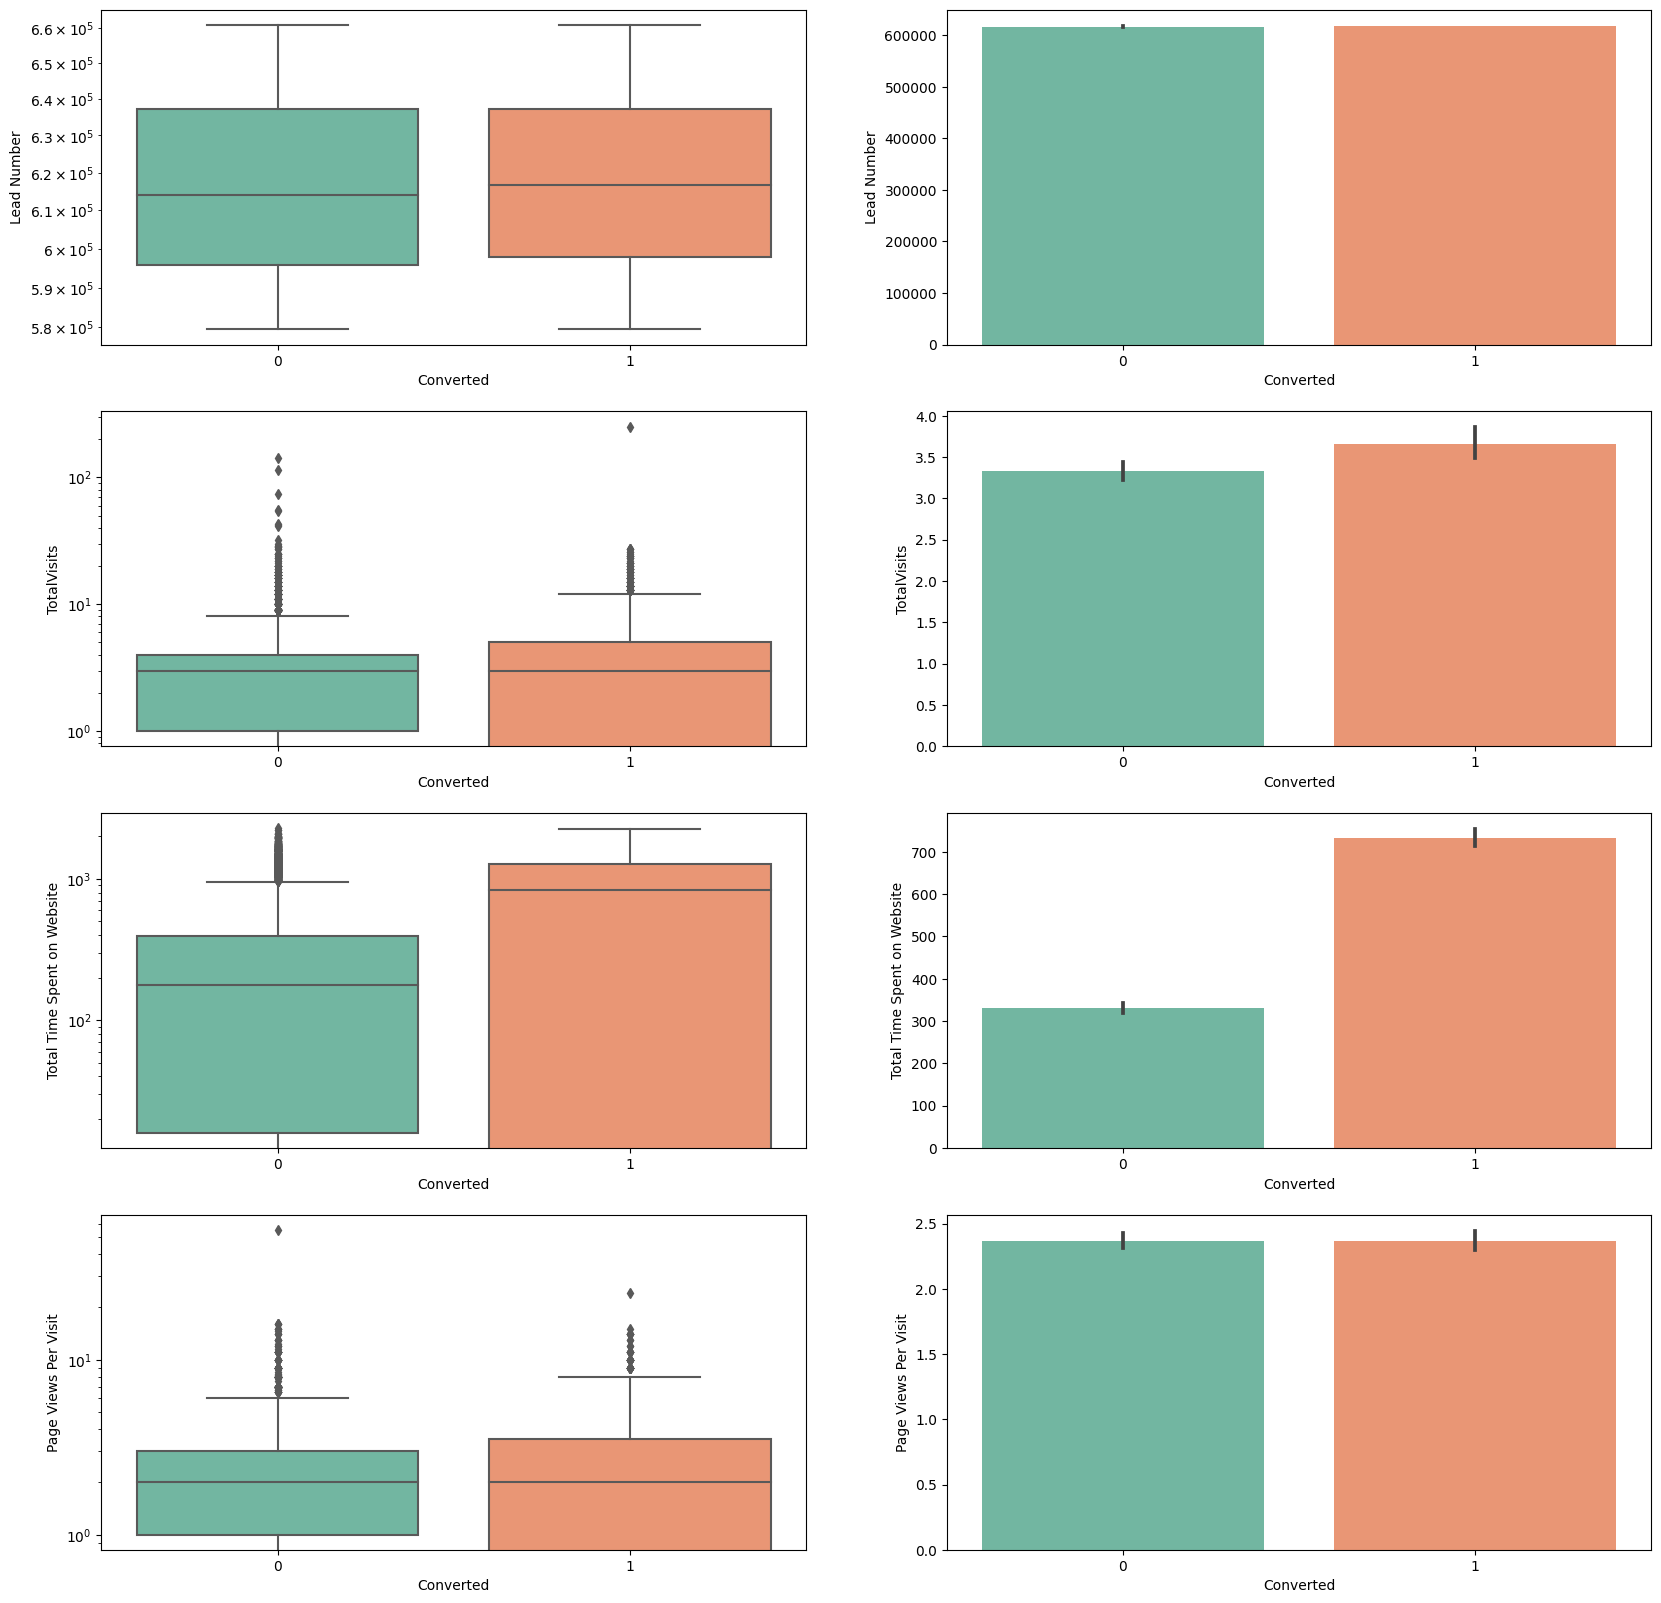

In [39]:
# Numerical features analysis

a,b,c = 4,2,1
plt.figure(figsize=(20,20))
for i in num_features:
  if i != 'Converted':

    plt.subplot(a,b,c)
    sns.boxplot(data=leads_df, x='Converted', y=i,palette='Set2')
    plt.yscale('log')
    c+=1
    plt.subplot(a,b,c)
    sns.barplot(y = i, x='Converted', palette='Set2', data = leads_df)
    c+=1
plt.show()



**Total Visits**
* As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of feature TotalVisits.

**Total Time Spent on Website**
* As can be seen, leads spending more time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate.

**Page Views Per Visit**
* As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of feature Page Views Per Visit.


Here Lead Number feature is unnecessary for our analysis.Hence drop that feature

In [40]:
# Dropping 'Lead Number' feature
leads_df.drop('Lead Number',axis=1, inplace=True)

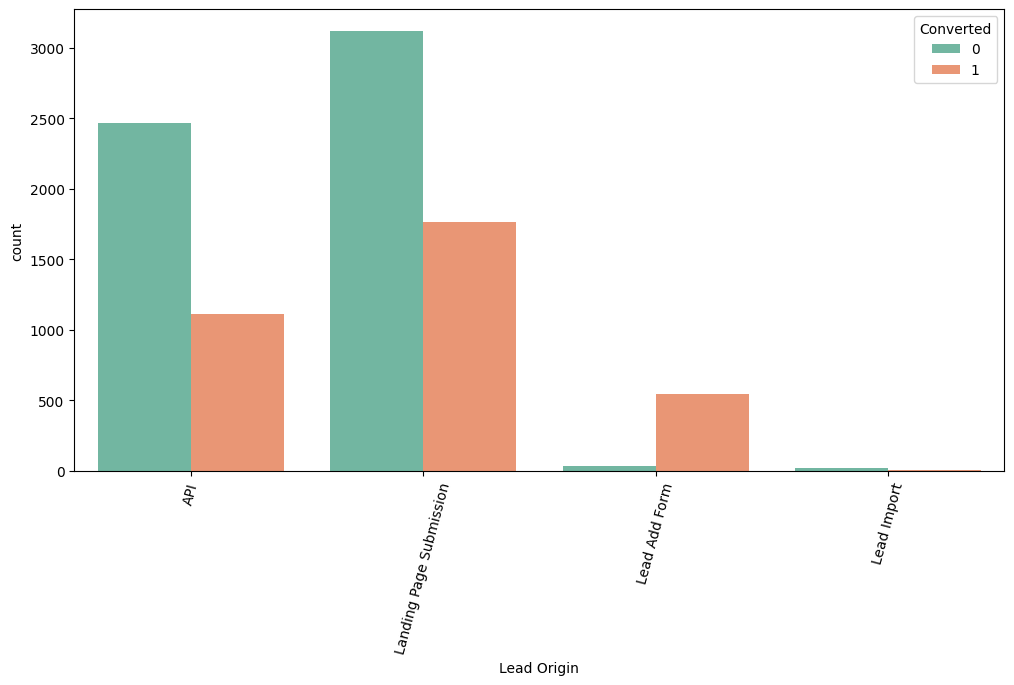

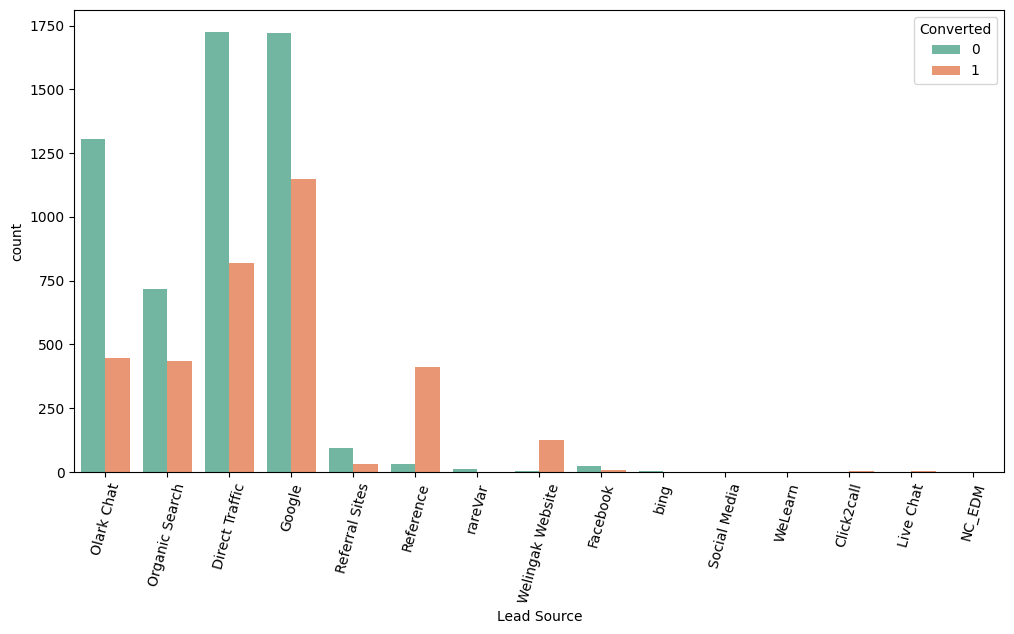

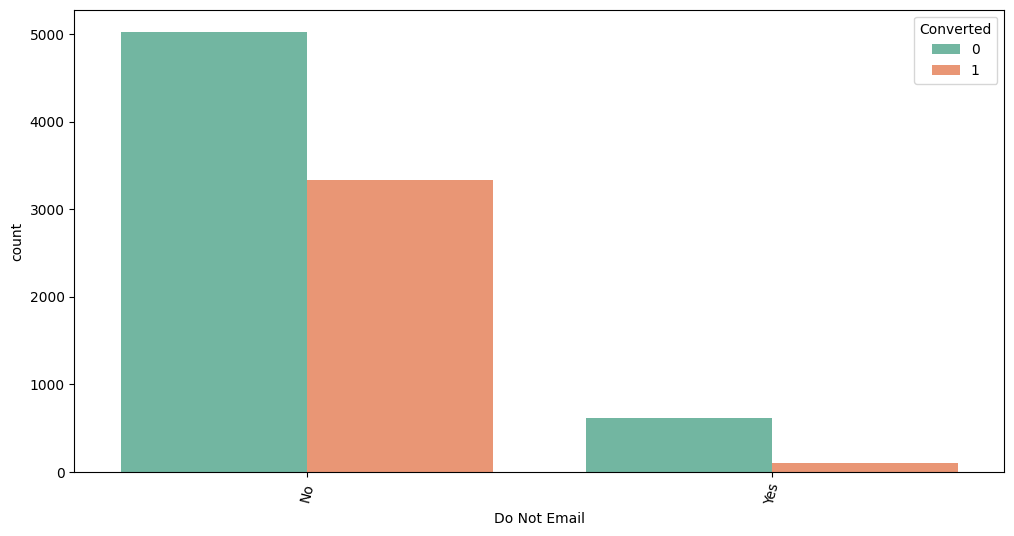

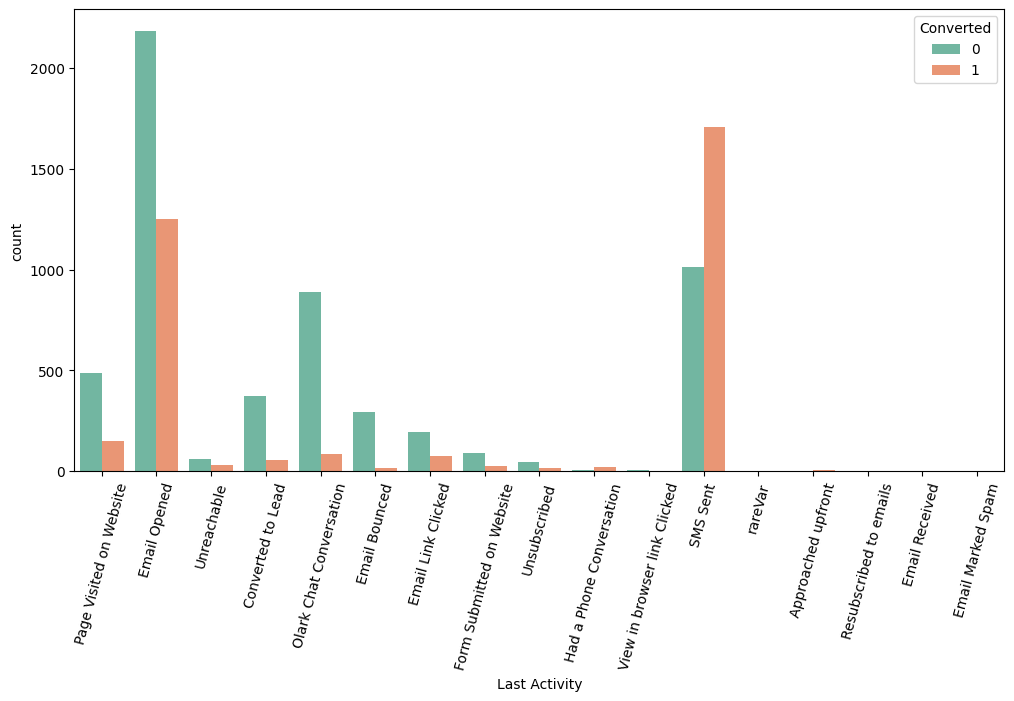

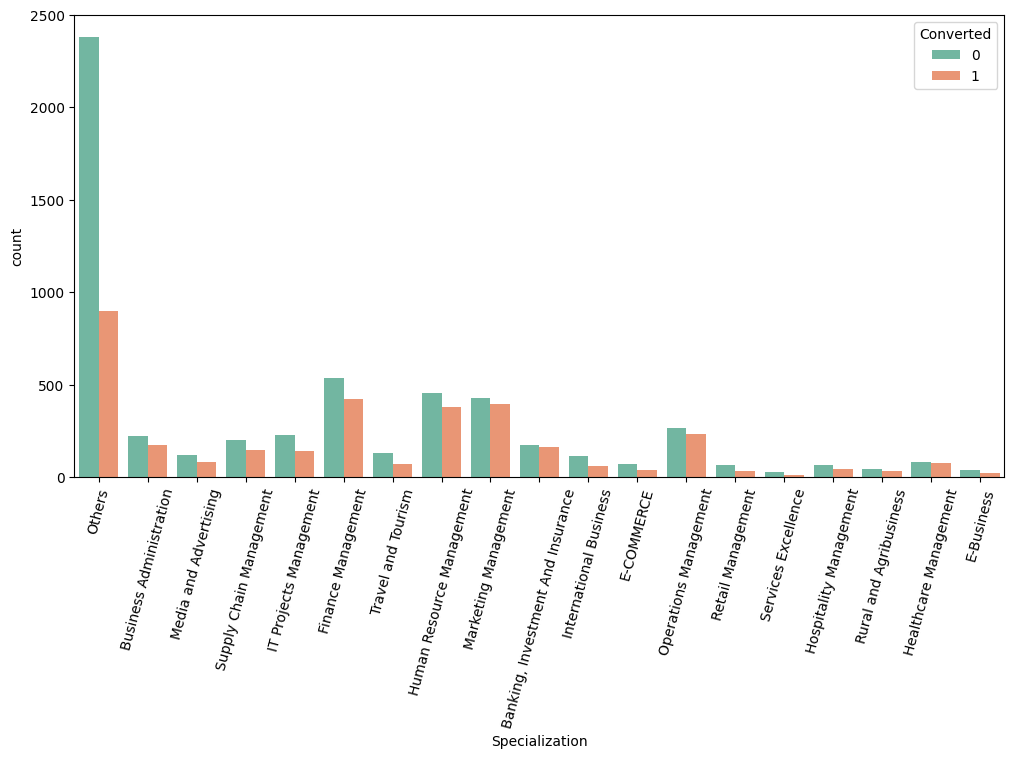

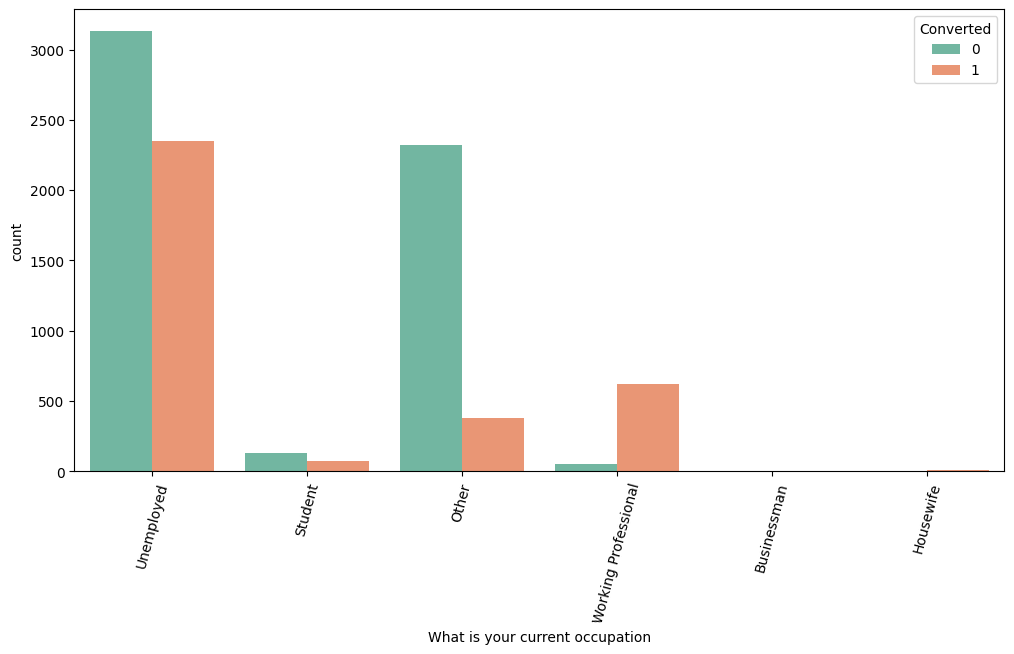

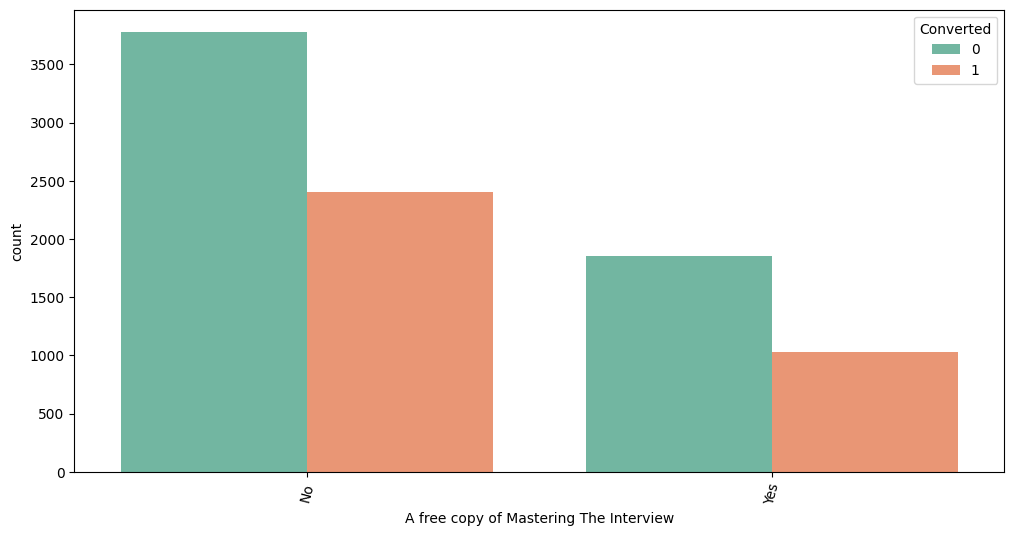

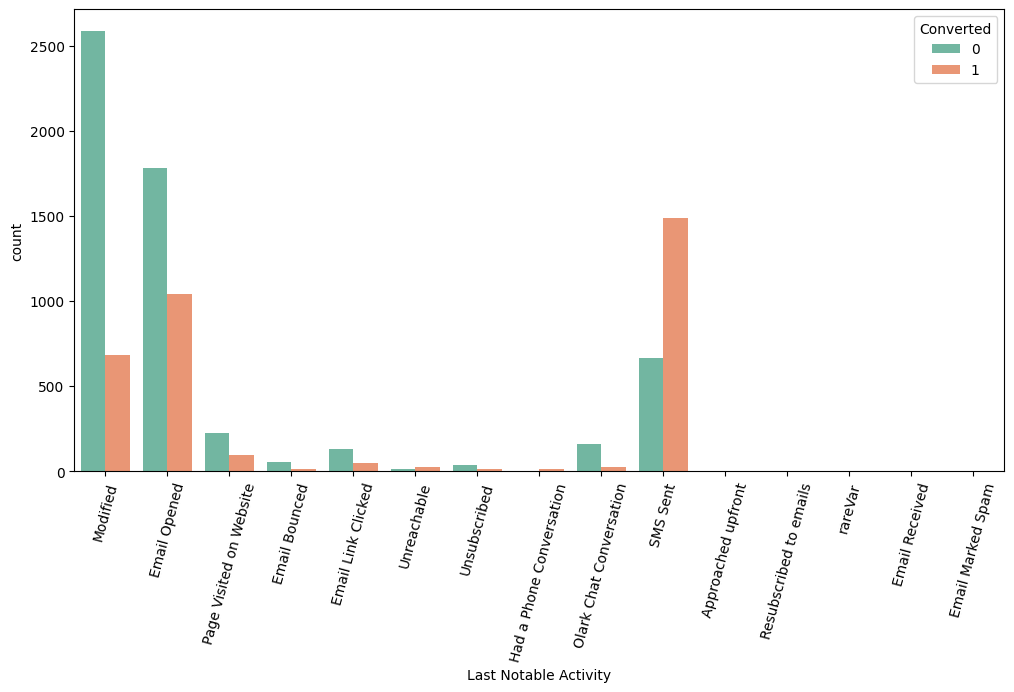

In [41]:
# Analysing Categorical features

cat_features = [i for i in leads_df.columns if leads_df[i].dtypes == 'O']

for i in cat_features:
  plt.figure(figsize=(12,6))
  sns.countplot(data=leads_df, x=i, hue='Converted', palette='Set2')
  plt.xticks(rotation=75)
  plt.show()

**Lead Source**
* Maximum Leads are generated by Google and Direct Traffic.
* Conversion rate of Reference leads and Welinkgak Website leads is very high.

**Last Activity**
* Maximum leads are generated having last activity as Email opened but conversion rate is not too good.
* SMS sent as last acitivity has high conversion rate.

**Cccupation**
*  Maximum leads generated are unemployed and their conversion rate is more than 50%.
*  Conversion rate of working professionals is very high






# **Data Preparation**

In [42]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
Prospect ID,,,,,,,,,,,,
7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,Modified
2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,Email Opened
8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,Modified


In [43]:
# List of Binary Variable to map
binary_var = [i for i in leads_df.columns if leads_df[i].nunique() == 2
                                            and leads_df[i].dtypes == 'O']
binary_var

['Do Not Email', 'A free copy of Mastering The Interview']

In [44]:
# Mapping the binary categorical to numerival feature
leads_df[binary_var] = leads_df[binary_var].apply(lambda x: x.map({'Yes':1,'No':0}))

In [45]:
# Listing the information of each features
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 7927b2df-8bba-4d29-b9a2-b6e0beafe620 to 571b5c8e-a5b2-4d57-8574-f2ffb06fdeff
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   int64  
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10

In [46]:
# Creating the dummy variables

leads_dummy = pd.get_dummies(leads_df, drop_first=True)

leads_dummy.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_rareVar
Prospect ID,,,,,,,,,,,,,,,,,,,,,
7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Splitting the Dataset

In [47]:
# Train-Test split

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(leads_dummy,train_size=0.70, random_state=100)

df_train.shape,df_test.shape

((6351, 76), (2723, 76))

In [48]:
# Now dividing the dataset to X and y

y_train = df_train.pop('Converted')
X_train = df_train

y_test = df_test.pop('Converted')
X_test = df_test

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6351, 75), (2723, 75), (6351,), (2723,))

### Feature Scaling

In [49]:
# Statistical information of the data

X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_rareVar
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.078885,3.471579,484.344198,2.377104,0.315383,0.535979,0.068651,0.003779,0.278066,0.003936,...,0.000157,0.001889,0.359471,0.019052,0.034483,0.000157,0.244371,0.004094,0.004409,0.000315
std,0.269581,5.171189,545.076458,2.099082,0.464705,0.498743,0.252879,0.061362,0.448082,0.062622,...,0.012548,0.043430,0.479883,0.136719,0.182480,0.012548,0.429747,0.063857,0.066257,0.017744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,247.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,5.000000,920.500000,3.330000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,251.000000,2226.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
# Listing down the features which needs to be standardized.

num_cols = [i for i in X_train.columns if X_train[i].nunique() > 2]

num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [51]:
# Scaling the feature using Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_test[num_cols] = scaler.transform(X_test[num_cols])


In [52]:
# Rechecking the statistical information after standardiztion

X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_rareVar
count,6351.000000,6.351000e+03,6.351000e+03,6.351000e+03,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.078885,-1.062849e-17,-2.908851e-17,7.663703e-17,0.315383,0.535979,0.068651,0.003779,0.278066,0.003936,...,0.000157,0.001889,0.359471,0.019052,0.034483,0.000157,0.244371,0.004094,0.004409,0.000315
std,0.269581,1.000079e+00,1.000079e+00,1.000079e+00,0.464705,0.498743,0.252879,0.061362,0.448082,0.062622,...,0.012548,0.043430,0.479883,0.136719,0.182480,0.012548,0.429747,0.063857,0.066257,0.017744
min,0.000000,-6.713838e-01,-8.886503e-01,-1.132538e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-4.779894e-01,-8.703028e-01,-6.561023e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-9.120076e-02,-4.354671e-01,-1.796662e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.955879e-01,8.002366e-01,4.539939e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.787059e+01,3.195502e+00,1.030193e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# Checking for data imbalance
print('Data Imbalance :', (leads_df['Converted'].mean() *100).round(2),'%' )

Data Imbalance : 37.86 %


### *Feature Elimination*

In [54]:
# Importing Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [55]:
# Feature elimination

from sklearn.feature_selection import RFE

rfe = RFE(logreg, n_features_to_select=18).fit(X_train, y_train)


In [56]:
# List of features RFE supported

rfe_features = X_train.columns[rfe.support_]
rfe_features

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Lead Source_rareVar', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [57]:
# List of features RFE removed

removed_features = X_train.columns[~rfe.support_]
removed_features

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked', 'Last Activity_rareVar',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMER

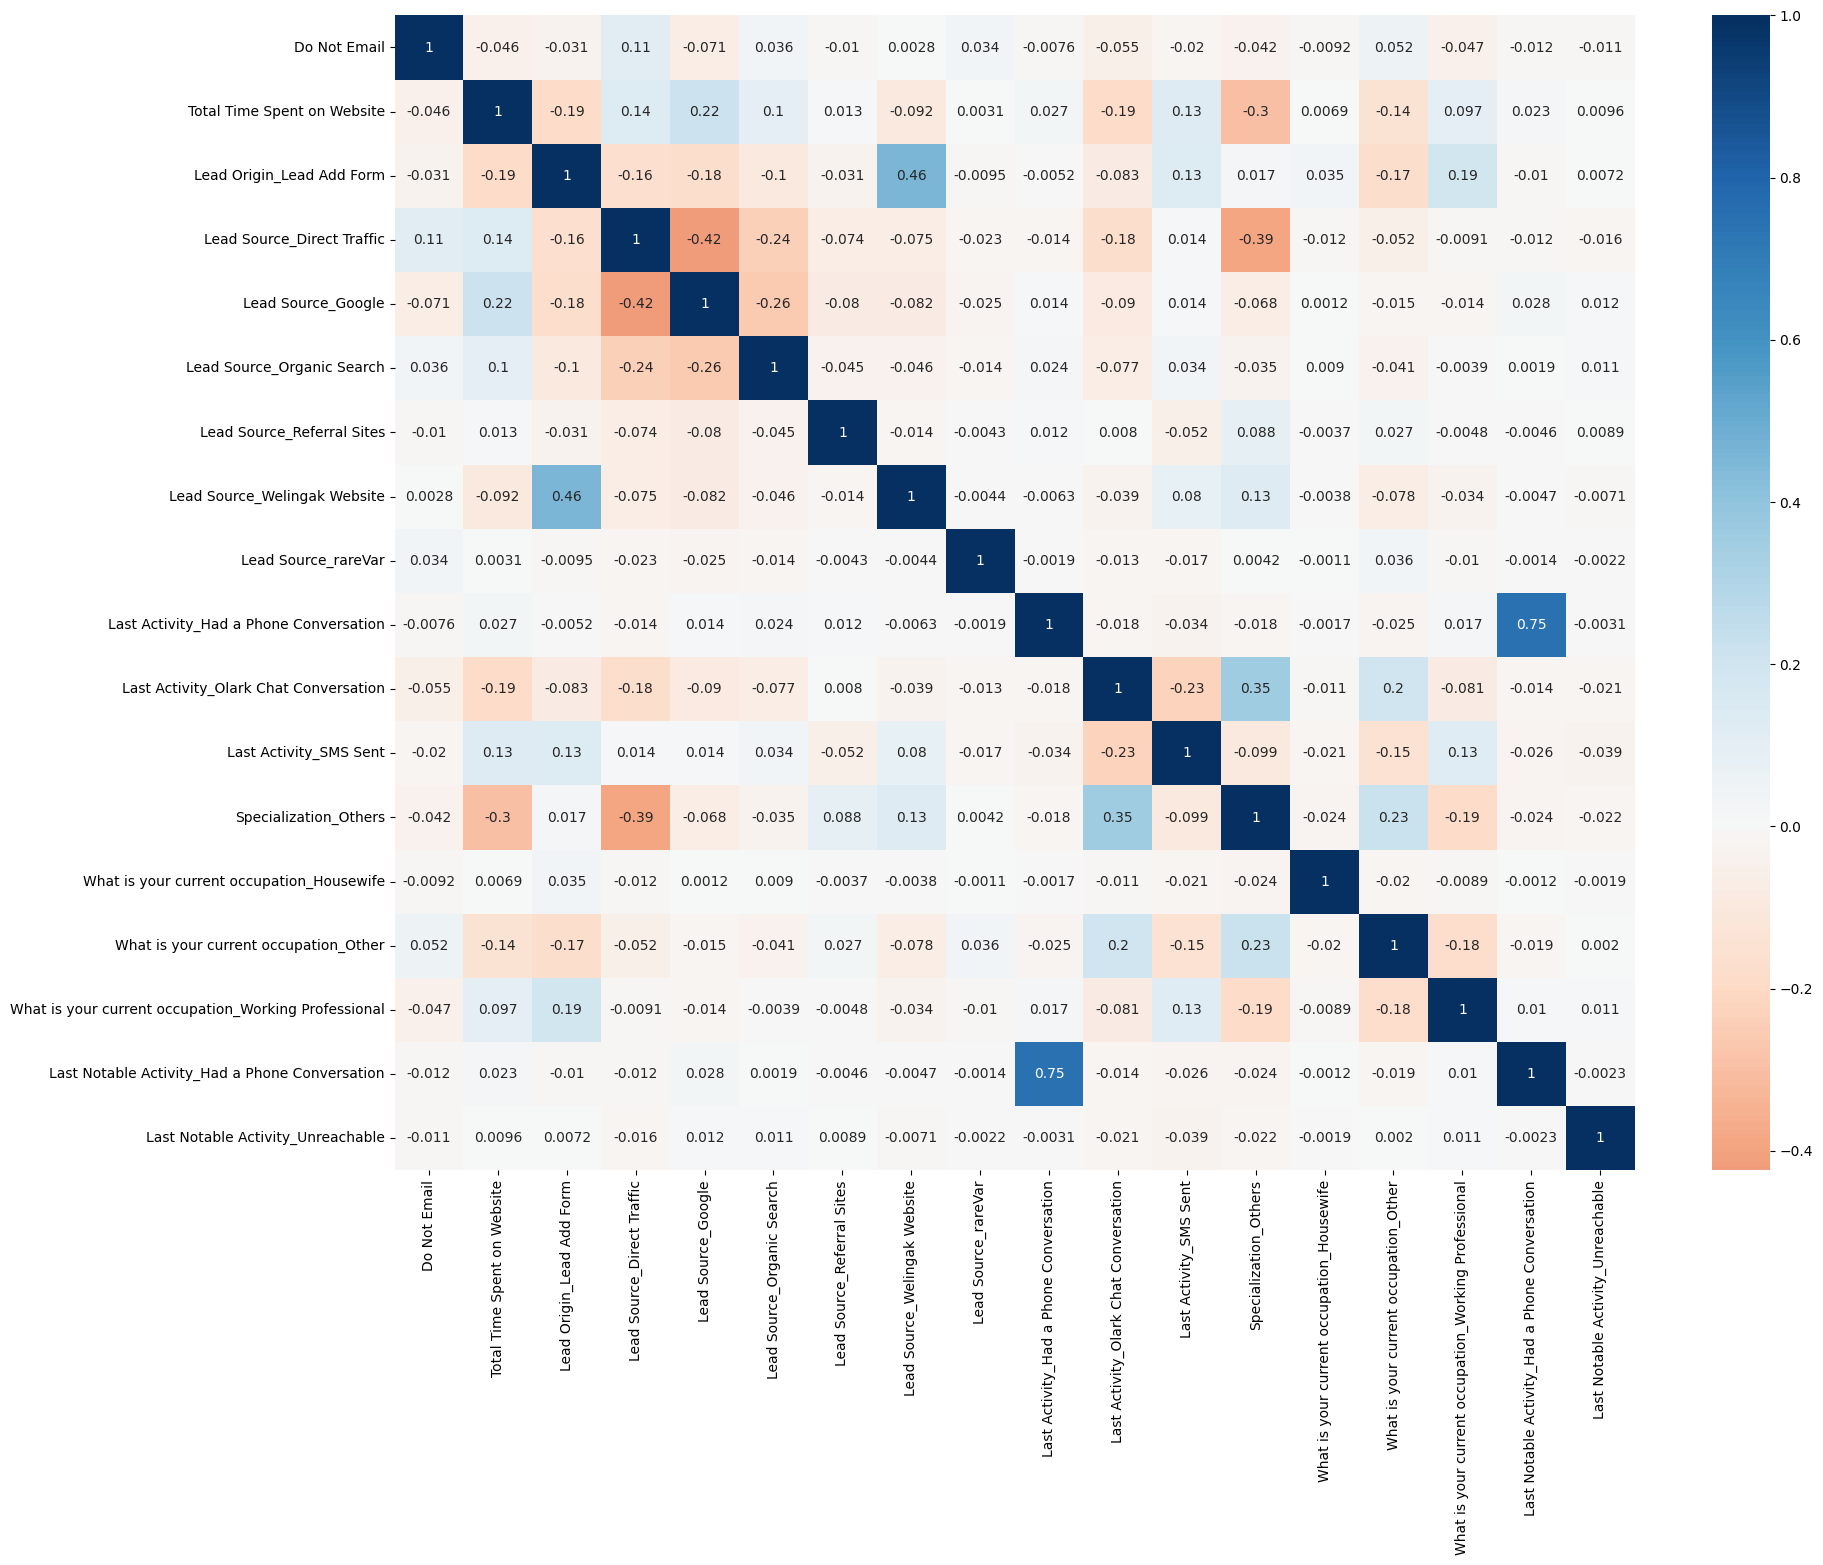

In [58]:
# Plotting the correlation matrix head map to analyse the correlation

plt.figure(figsize=(20,15))
sns.heatmap(leads_dummy[rfe_features].corr(), cmap='RdBu', annot=True, center=0 )
plt.show()

# Model Building

In [59]:
# Model building using statsmodel library

import statsmodels.api as sm

# Adding constant

X_train_sm = sm.add_constant(X_train[rfe_features])


#### Model_1

In [60]:
# Building first model

lr1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.4
Date:                Thu, 12 Oct 2023   Deviance:                       5146.7
Time:                        13:53:01   Pearson chi2:                 6.21e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4071
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6044      0.120      5.052      0.000       0.370       0.839
Do Not Email                                            -1.5644      0.173     -9.021      0.000      -1.904      -1.225
Total Time Spent on Website                              1.1381      0.041     27.738      0.000       1.058       1.219
Lead Origin_Lead Add Form                                2.0119      0.231      8.723      0.000       1.560       2.464
Lead Source_Direct Traffic                              -1.9795      0.137    -14.493      0.000      -2.247      -1.712
Lead Source_Google                                      -1.4837      0.123    -12.071      0.000      -1.725      -1.243
Lead Source_Organic Search                              -1.7112      0.143    -11.928      0.000      -1.992      -1.430
Lead Source_Referral Sites                              -1.7308      0.363     -4.773      0.000      -2.441      -1.020
Lead Source_Welingak Website                             2.1817      0.753      2.897      0.004       0.706       3.658
Lead Source_rareVar                                    -23.0419   2.36e+04     -0.001      0.999   -4.64e+04    4.63e+04
Last Activity_Had a Phone Conversation                   1.5560      1.131      1.376      0.169      -0.661       3.773
Last Activity_Olark Chat Conversation                   -1.2673      0.166     -7.636      0.000      -1.593      -0.942
Last Activity_SMS Sent                                   1.3193      0.075     17.556      0.000       1.172       1.467
Specialization_Others                                   -0.3704      0.091     -4.055      0.000      -0.549      -0.191
What is your current occupation_Housewife               23.7148   2.57e+04      0.001      0.999   -5.03e+04    5.03e+04
What is your current occupation_Other                   -1.2393      0.088    -14.043      0.000      -1.412      -1.066
What is your current occupation_Working Professional     2.4073      0.187     12.853      0.000       2.040       2.774
Last Notable Activity_Had a Phone Conversation           1.9247      1.589      1.211      0.226      -1.190       5.039
Last Notable Activity_Unreachable                        2.0585      0.500      4.119      0.000       1.079       3.038
========================================================================================================================
"""

**P-value > 0.05 --> Insignificance**

Droping the insignificant feature one by one.

Since the  'Lead Source_rareVar' feature has high p-vale we drop first.

#### *Model_2*

In [61]:
# Dropping the insignificant feature

features = rfe_features.tolist()

features.remove('Lead Source_rareVar')

In [62]:
# Building second model

X_train_sm = sm.add_constant(X_train[features])

lr2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.1
Date:                Thu, 12 Oct 2023   Deviance:                       5156.1
Time:                        13:53:01   Pearson chi2:                 6.21e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4062
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5672      0.119      4.783      0.000       0.335       0.800
Do Not Email                                            -1.5781      0.173     -9.122      0.000      -1.917      -1.239
Total Time Spent on Website                              1.1328      0.041     27.698      0.000       1.053       1.213
Lead Origin_Lead Add Form                                2.0389      0.230      8.847      0.000       1.587       2.491
Lead Source_Direct Traffic                              -1.9400      0.135    -14.322      0.000      -2.205      -1.674
Lead Source_Google                                      -1.4474      0.122    -11.870      0.000      -1.686      -1.208
Lead Source_Organic Search                              -1.6755      0.143    -11.748      0.000      -1.955      -1.396
Lead Source_Referral Sites                              -1.7011      0.362     -4.697      0.000      -2.411      -0.991
Lead Source_Welingak Website                             2.1757      0.753      2.889      0.004       0.700       3.652
Last Activity_Had a Phone Conversation                   1.5527      1.131      1.373      0.170      -0.664       3.769
Last Activity_Olark Chat Conversation                   -1.2502      0.166     -7.538      0.000      -1.575      -0.925
Last Activity_SMS Sent                                   1.3245      0.075     17.636      0.000       1.177       1.472
Specialization_Others                                   -0.3581      0.091     -3.937      0.000      -0.536      -0.180
What is your current occupation_Housewife               22.7151   1.56e+04      0.001      0.999   -3.05e+04    3.06e+04
What is your current occupation_Other                   -1.2508      0.088    -14.182      0.000      -1.424      -1.078
What is your current occupation_Working Professional     2.4087      0.187     12.869      0.000       2.042       2.776
Last Notable Activity_Had a Phone Conversation           1.9290      1.589      1.214      0.225      -1.185       5.043
Last Notable Activity_Unreachable                        2.0640      0.500      4.129      0.000       1.084       3.044
========================================================================================================================
"""

#### *Model_3*

In [63]:
# Dropping the insignificant feature

features.remove('What is your current occupation_Housewife')

In [64]:
# Building third model

X_train_sm = sm.add_constant(X_train[features])

lr3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2582.4
Date:                Thu, 12 Oct 2023   Deviance:                       5164.8
Time:                        13:53:02   Pearson chi2:                 6.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4054
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5736      0.119      4.839      0.000       0.341       0.806
Do Not Email                                            -1.5818      0.173     -9.144      0.000      -1.921      -1.243
Total Time Spent on Website                              1.1321      0.041     27.714      0.000       1.052       1.212
Lead Origin_Lead Add Form                                2.0573      0.230      8.936      0.000       1.606       2.509
Lead Source_Direct Traffic                              -1.9401      0.135    -14.331      0.000      -2.205      -1.675
Lead Source_Google                                      -1.4486      0.122    -11.883      0.000      -1.688      -1.210
Lead Source_Organic Search                              -1.6660      0.142    -11.699      0.000      -1.945      -1.387
Lead Source_Referral Sites                              -1.7015      0.362     -4.699      0.000      -2.411      -0.992
Lead Source_Welingak Website                             2.1579      0.753      2.866      0.004       0.682       3.634
Last Activity_Had a Phone Conversation                   1.5441      1.131      1.365      0.172      -0.673       3.761
Last Activity_Olark Chat Conversation                   -1.2524      0.166     -7.551      0.000      -1.577      -0.927
Last Activity_SMS Sent                                   1.3192      0.075     17.576      0.000       1.172       1.466
Specialization_Others                                   -0.3631      0.091     -3.994      0.000      -0.541      -0.185
What is your current occupation_Other                   -1.2531      0.088    -14.213      0.000      -1.426      -1.080
What is your current occupation_Working Professional     2.4030      0.187     12.839      0.000       2.036       2.770
Last Notable Activity_Had a Phone Conversation           1.9322      1.589      1.216      0.224      -1.183       5.047
Last Notable Activity_Unreachable                        2.0591      0.500      4.119      0.000       1.079       3.039
========================================================================================================================
"""

#### *Model_4*

In [65]:
# Dropping the insignificant feature

features.remove('Last Notable Activity_Had a Phone Conversation')

In [66]:
# Building third model

X_train_sm = sm.add_constant(X_train[features])

lr4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2583.2
Date:                Thu, 12 Oct 2023   Deviance:                       5166.4
Time:                        13:53:02   Pearson chi2:                 6.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4052
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5758      0.119      4.857      0.000       0.343       0.808
Do Not Email                                            -1.5877      0.173     -9.180      0.000      -1.927      -1.249
Total Time Spent on Website                              1.1315      0.041     27.703      0.000       1.051       1.212
Lead Origin_Lead Add Form                                2.0564      0.230      8.932      0.000       1.605       2.508
Lead Source_Direct Traffic                              -1.9411      0.135    -14.338      0.000      -2.206      -1.676
Lead Source_Google                                      -1.4484      0.122    -11.880      0.000      -1.687      -1.209
Lead Source_Organic Search                              -1.6715      0.142    -11.737      0.000      -1.951      -1.392
Lead Source_Referral Sites                              -1.7087      0.363     -4.701      0.000      -2.421      -0.996
Lead Source_Welingak Website                             2.1609      0.753      2.870      0.004       0.685       3.637
Last Activity_Had a Phone Conversation                   2.6686      0.733      3.641      0.000       1.232       4.105
Last Activity_Olark Chat Conversation                   -1.2517      0.166     -7.547      0.000      -1.577      -0.927
Last Activity_SMS Sent                                   1.3194      0.075     17.579      0.000       1.172       1.466
Specialization_Others                                   -0.3672      0.091     -4.040      0.000      -0.545      -0.189
What is your current occupation_Other                   -1.2513      0.088    -14.200      0.000      -1.424      -1.079
What is your current occupation_Working Professional     2.4032      0.187     12.839      0.000       2.036       2.770
Last Notable Activity_Unreachable                        2.0585      0.500      4.118      0.000       1.079       3.038
========================================================================================================================
"""

Since the P-values looks good.

Now check for the VIF(Variable Inflation Factor) value.

In [67]:
# Creating the function to calculate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(cols):
    df = X_train_sm[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [ variance_inflation_factor(df.values, i) for i in range (df.shape[1]) ]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by= 'VIF', ascending= False )

In [68]:
# Checking VIF value for the model 4

get_vif(features)

,Features,VIF
11,Specialization_Others,1.85
2,Lead Origin_Lead Add Form,1.57
12,What is your current occupation_Other,1.55
10,Last Activity_SMS Sent,1.52
4,Lead Source_Google,1.43
7,Lead Source_Welingak Website,1.36
9,Last Activity_Olark Chat Conversation,1.35
3,Lead Source_Direct Traffic,1.33
1,Total Time Spent on Website,1.28
5,Lead Source_Organic Search,1.19


All features have a good value of VIF. So we need not drop any more features and we can proceed with making predictions using this model

# **Predicting the train model**

In [69]:
# Predicting the target variable

y_train_pred = lr4.predict(X_train_sm)

In [70]:
# Creating the dataframe with predicted value

y_train_pred_df = pd.DataFrame({'Converted':y_train.values, 'Predicted_prob':y_train_pred})

y_train_pred_df.head()

,Converted,Predicted_prob
Prospect ID,,
42a4d521-df88-4b5a-b198-50594a407a2d,0,0.057438
4594be86-3b2e-4b55-866b-5a4b05ffd0f6,0,0.178280
c3bb1471-53d5-4244-b2e5-4bbb543835c1,0,0.627742
9bce5fbc-8d57-4dc9-8f82-fd11d94d9969,1,0.636951
b0bfbc32-bd4a-4376-a829-5318bc0e9547,1,0.903517


In [71]:
# Creating the function to plot ROC curve

from sklearn import metrics

def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

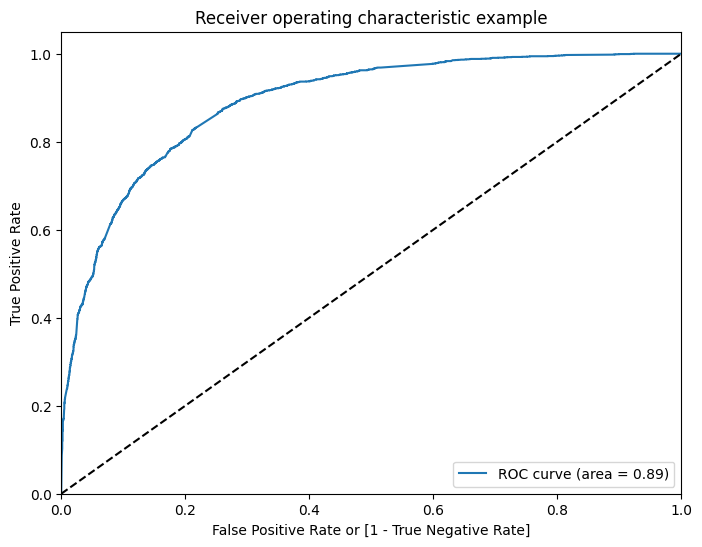

In [72]:
# Plotting the ROC curve for the model.

plot_roc(y_train_pred_df['Converted'], y_train_pred_df['Predicted_prob'])


Finding the optimum cut-off probability using different cut-offs

In [73]:
# Creating the features with different cut-off probability

cut_offs = [float(i)/10 for i in range(10)]

for i in cut_offs:
  y_train_pred_df[i] = y_train_pred_df['Predicted_prob'].map(lambda x : 1 if x>i else 0)

y_train_pred_df.head()

,Converted,Predicted_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Prospect ID,,,,,,,,,,,,
42a4d521-df88-4b5a-b198-50594a407a2d,0,0.057438,1,0,0,0,0,0,0,0,0,0
4594be86-3b2e-4b55-866b-5a4b05ffd0f6,0,0.178280,1,1,0,0,0,0,0,0,0,0
c3bb1471-53d5-4244-b2e5-4bbb543835c1,0,0.627742,1,1,1,1,1,1,1,0,0,0
9bce5fbc-8d57-4dc9-8f82-fd11d94d9969,1,0.636951,1,1,1,1,1,1,1,0,0,0
b0bfbc32-bd4a-4376-a829-5318bc0e9547,1,0.903517,1,1,1,1,1,1,1,1,1,1


In [74]:
# Creating the evaluation metrics dataframe

metrics_df = pd.DataFrame( columns=['Cut-offs', 'Accuracy', 'Sensitivity', 'Specificity'] )

from sklearn.metrics import confusion_matrix

for i in cut_offs:
    c_matrix = confusion_matrix(y_train_pred_df['Converted'], y_train_pred_df[i])

    Accuracy = (c_matrix[0,0] + c_matrix[1,1]) / sum(sum(c_matrix))
    Sensitivity = c_matrix[1,1] / (c_matrix[1,0] + c_matrix[1,1])
    Specificity = c_matrix[0,0] / (c_matrix[0,0] + c_matrix[0,1])

    metrics_df.loc[i] = [i, Accuracy, Sensitivity, Specificity]

metrics_df

,Cut-offs,Accuracy,Sensitivity,Specificity
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.605416,0.985282,0.367478
0.2,0.2,0.761612,0.916599,0.664533
0.3,0.3,0.791529,0.868357,0.743406
0.4,0.4,0.808377,0.764105,0.836108
0.5,0.5,0.814045,0.704415,0.882714
0.6,0.6,0.806487,0.634505,0.914213
0.7,0.7,0.784758,0.529436,0.944686
0.8,0.8,0.759565,0.429681,0.966197
0.9,0.9,0.714533,0.280458,0.986428


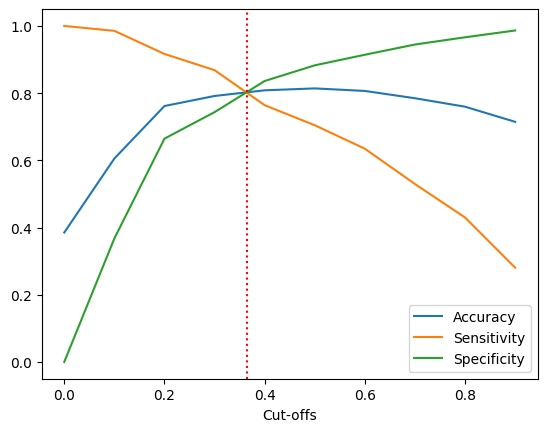

In [75]:
# Plotting the metrics

metrics_df.plot.line( x= 'Cut-offs', y=['Accuracy', 'Sensitivity', 'Specificity'])
plt.axvline(x=0.365, color='r', linestyle=':')
plt.show()

From the curve above 0.365 could be the optimal cut-off point.

In [76]:
# Creating the new feature with optimal_cutoff predicted value
y_train_pred_df['final_predicted'] = y_train_pred_df['Predicted_prob'].map(lambda x : 1 if x>0.365 else 0)

y_train_pred_df.head()

,Converted,Predicted_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
Prospect ID,,,,,,,,,,,,,
42a4d521-df88-4b5a-b198-50594a407a2d,0,0.057438,1,0,0,0,0,0,0,0,0,0,0
4594be86-3b2e-4b55-866b-5a4b05ffd0f6,0,0.178280,1,1,0,0,0,0,0,0,0,0,0
c3bb1471-53d5-4244-b2e5-4bbb543835c1,0,0.627742,1,1,1,1,1,1,1,0,0,0,1
9bce5fbc-8d57-4dc9-8f82-fd11d94d9969,1,0.636951,1,1,1,1,1,1,1,0,0,0,1
b0bfbc32-bd4a-4376-a829-5318bc0e9547,1,0.903517,1,1,1,1,1,1,1,1,1,1,1


In [77]:
# Assigning the lead Score feature based on probability

y_train_pred_df['Lead Score'] = y_train_pred_df['Predicted_prob'].map(lambda x : round(x*100))

y_train_pred_df.head()

,Converted,Predicted_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
Prospect ID,,,,,,,,,,,,,,
42a4d521-df88-4b5a-b198-50594a407a2d,0,0.057438,1,0,0,0,0,0,0,0,0,0,0,6
4594be86-3b2e-4b55-866b-5a4b05ffd0f6,0,0.178280,1,1,0,0,0,0,0,0,0,0,0,18
c3bb1471-53d5-4244-b2e5-4bbb543835c1,0,0.627742,1,1,1,1,1,1,1,0,0,0,1,63
9bce5fbc-8d57-4dc9-8f82-fd11d94d9969,1,0.636951,1,1,1,1,1,1,1,0,0,0,1,64
b0bfbc32-bd4a-4376-a829-5318bc0e9547,1,0.903517,1,1,1,1,1,1,1,1,1,1,1,90


In [78]:
# Creating the final data frame

lead_score_train_df = y_train_pred_df[['Converted', 'Predicted_prob', 'final_predicted', 'Lead Score']]

lead_score_train_df.head()

,Converted,Predicted_prob,final_predicted,Lead Score
Prospect ID,,,,
42a4d521-df88-4b5a-b198-50594a407a2d,0,0.057438,0,6
4594be86-3b2e-4b55-866b-5a4b05ffd0f6,0,0.178280,0,18
c3bb1471-53d5-4244-b2e5-4bbb543835c1,0,0.627742,1,63
9bce5fbc-8d57-4dc9-8f82-fd11d94d9969,1,0.636951,1,64
b0bfbc32-bd4a-4376-a829-5318bc0e9547,1,0.903517,1,90


# **Model Evaluation**

In [79]:
# Accuracy score
print('Accuracy :',(metrics.accuracy_score(lead_score_train_df['Converted'], lead_score_train_df['final_predicted'])*100).round(2),'%')

Accuracy : 80.41 %


In [80]:
# F-1 score
print('F-1 Score :',(metrics.f1_score(lead_score_train_df['Converted'], lead_score_train_df['final_predicted'])*100).round(2),'%')

F-1 Score : 75.69 %


In [81]:
# Precision score
print('Precision :',(metrics.precision_score(lead_score_train_df['Converted'], lead_score_train_df['final_predicted'])*100).round(2),'%')

Precision : 72.49 %


In [82]:
# Recall score
print('Recall :',(metrics.recall_score(lead_score_train_df['Converted'], lead_score_train_df['final_predicted'])*100).round(2),'%')

Recall : 79.19 %


In [83]:
# Confusion Matrix
metrics.confusion_matrix(lead_score_train_df['Converted'], lead_score_train_df['final_predicted'])

array([[3170,  735],
       [ 509, 1937]])

In [84]:
# Precision recall trade off

precision, recall, threshold = metrics.precision_recall_curve(lead_score_train_df['Converted'], lead_score_train_df['Predicted_prob'])

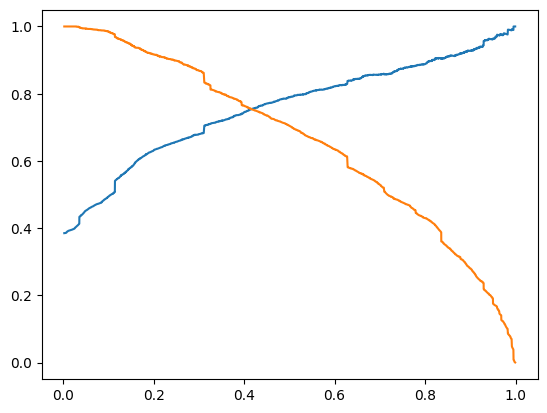

In [85]:
# Plotting precision recall curve

plt.plot(threshold, precision[:-1])
plt.plot(threshold, recall[:-1])
plt.show()

## **Making prediction on test dataset**

In [86]:
# Test dataset shape

X_test.shape

(2723, 75)

In [87]:
# Assigning the features selected by our final model

# features.remove('const')
X_test_final = X_test[features]
X_test_final.shape

(2723, 15)

In [88]:
# Adding the constant
X_test_sm = sm.add_constant(X_test_final)

# Making prediction on test
y_test_pred = lr4.predict(X_test_sm)

In [89]:
# Creating the dataframe of y_test predicted

lead_score_test_df = pd.DataFrame({'Converted': y_test.values, 'Predicted_prob': y_test_pred})
lead_score_test_df.head()

,Converted,Predicted_prob
Prospect ID,,
afc71cc4-67a4-42ae-89f7-779d20c5810d,0,0.040288
a8b4e742-2cce-4280-8549-a4a7d51a0fe2,1,0.959820
774a3b07-491d-4311-ad51-b25cc8cc59ec,0,0.034129
16b63196-0da9-4b2d-974d-21d8f625f5ef,1,0.835722
cbd89429-18cd-47b1-9699-21987bd70a8e,0,0.046887


In [90]:
# Assigning the optimum cut-off value from our model

lead_score_test_df['final_predicted'] = lead_score_test_df['Predicted_prob'].map(lambda x : 1 if x > 0.365 else 0)

lead_score_test_df.head()

,Converted,Predicted_prob,final_predicted
Prospect ID,,,
afc71cc4-67a4-42ae-89f7-779d20c5810d,0,0.040288,0
a8b4e742-2cce-4280-8549-a4a7d51a0fe2,1,0.959820,1
774a3b07-491d-4311-ad51-b25cc8cc59ec,0,0.034129,0
16b63196-0da9-4b2d-974d-21d8f625f5ef,1,0.835722,1
cbd89429-18cd-47b1-9699-21987bd70a8e,0,0.046887,0


#### Evalution metrics of predicted test set

In [91]:
# Accuaracy of test predicted

print('Accuracy :', (metrics.accuracy_score(lead_score_test_df['Converted'], lead_score_test_df['final_predicted'])*100).round(2),'%' )

Accuracy : 81.6 %


In [92]:
# Confusion matrix

print('Confusion matrix :\n', metrics.confusion_matrix(lead_score_test_df['Converted'], lead_score_test_df['final_predicted']))

Confusion matrix :
 [[1434  300]
 [ 201  788]]


In [93]:
# F-1 score

print('F-1 Score :', (metrics.f1_score(lead_score_test_df['Converted'], lead_score_test_df['final_predicted'])*100).round(2),'%' )

F-1 Score : 75.88 %


In [94]:
# Precision score

print('Precision :', (metrics.precision_score(lead_score_test_df['Converted'], lead_score_test_df['final_predicted'])*100).round(2),'%' )

Precision : 72.43 %


In [95]:
# Recall score

print('Recall :', (metrics.recall_score(lead_score_test_df['Converted'], lead_score_test_df['final_predicted'])*100).round(2),'%' )

Recall : 79.68 %


In [96]:
# Assigning the lead score at test set

lead_score_test_df['Lead Score'] = lead_score_test_df['Predicted_prob'].map(lambda x : round(x*100) )
lead_score_test_df.head()

,Converted,Predicted_prob,final_predicted,Lead Score
Prospect ID,,,,
afc71cc4-67a4-42ae-89f7-779d20c5810d,0,0.040288,0,4
a8b4e742-2cce-4280-8549-a4a7d51a0fe2,1,0.959820,1,96
774a3b07-491d-4311-ad51-b25cc8cc59ec,0,0.034129,0,3
16b63196-0da9-4b2d-974d-21d8f625f5ef,1,0.835722,1,84
cbd89429-18cd-47b1-9699-21987bd70a8e,0,0.046887,0,5


### **Evalution Results**

**Train Results**
-  Accuracy  - 80.41 %
-  F-1 Score - 75.69 %
-  Precision - 72.49 %
-  Recall-79.19 %

**Test Results**
-  Accuracy  - 81.6 %
-  F-1 Score - 75.88 %
-  Precision -  72.43 %
-  Recall-  79.68 %

In [97]:
# Combining the train and test to find out hot leads
combined_df = lead_score_train_df.append(lead_score_test_df)
combined_df.shape

(9074, 4)

In [98]:
# Most potential leads

hot_leads = combined_df[combined_df['Lead Score']>= 85 ]

hot_leads.shape

(1307, 4)

**HOT LEADS**

Out of 9074 leads only 1370 are most potential leads.


In [99]:
# Important features by our model

lr4.params.sort_values(ascending=False)


Last Activity_Had a Phone Conversation                  2.668564
What is your current occupation_Working Professional    2.403198
Lead Source_Welingak Website                            2.160899
Last Notable Activity_Unreachable                       2.058524
Lead Origin_Lead Add Form                               2.056390
Last Activity_SMS Sent                                  1.319358
Total Time Spent on Website                             1.131484
const                                                   0.575843
Specialization_Others                                  -0.367165
What is your current occupation_Other                  -1.251274
Last Activity_Olark Chat Conversation                  -1.251696
Lead Source_Google                                     -1.448415
Do Not Email                                           -1.587722
Lead Source_Organic Search                             -1.671530
Lead Source_Referral Sites                             -1.708657
Lead Source_Direct Traffi

**Important features responsible for good conversion rate or the one which contributes more towards the probability of a lead getting converted**
-  Last Activity had a Phone Conversation
-  Current occupation_Working Professional
-  Lead Source Welingak Website